# EA1:

*By Daniel Deutsch and José Lucas Barretto*

In [2]:
import numpy as np
import pandas as pd
import statsmodels.tsa.stattools as sm
import matplotlib.pyplot as plt

In [3]:
# Matplotlib styles
plt.style.use('ggplot')
plt.rcParams.update({
    'figure.figsize': (15, 4),
    'axes.prop_cycle': plt.cycler(color=["#4C72B0", "#C44E52", "#55A868", "#8172B2", "#CCB974", "#64B5CD"]),
    'axes.facecolor': "#EAEAF2"
})

## Load the Data

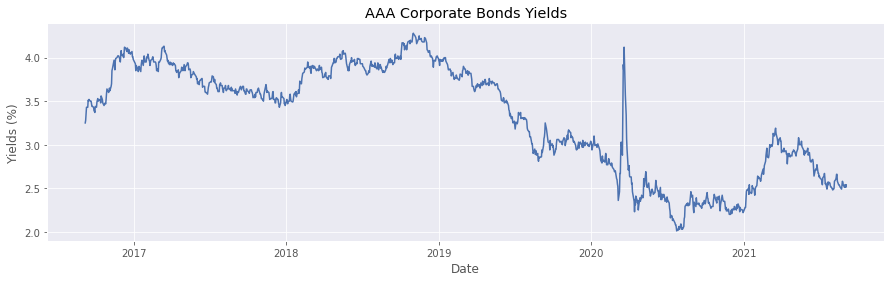

In [4]:
# Loads data and makes small modifications on the df
df_aaa = pd.read_csv("datasets/AAA_corpbonds_yields.csv", na_values='.')
df_aaa['DATE'] = pd.to_datetime(df_aaa['DATE'], format='%Y-%m-%d')
df_aaa.rename(columns={'DATE': 'date', 'DAAA': 'value'}, inplace=True)
df_aaa.dropna(inplace=True)

# Plots the time series
plt.plot(df_aaa['date'], df_aaa['value'])
plt.title("AAA Corporate Bonds Yields")
plt.xlabel("Date")
plt.ylabel("Yields (%)")
plt.show()

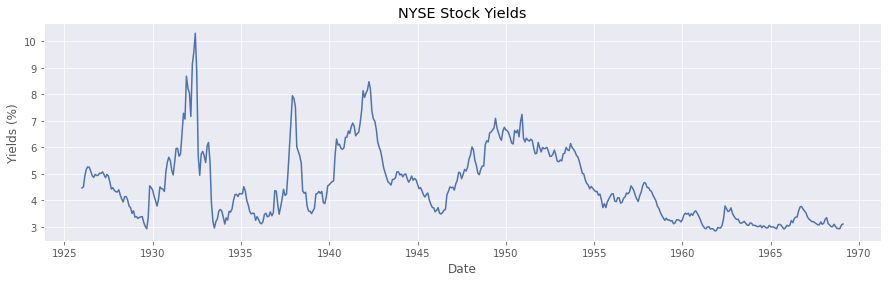

In [5]:
# Loads data and makes small modifications on the df
df_nyse = pd.read_csv("datasets/NYSE_stock_yields.csv", na_values='.')
df_nyse['DATE'] = pd.to_datetime(df_nyse['DATE'], format='%Y-%m-%d')
df_nyse.rename(columns={'DATE': 'date', 'M1346BUSM156NNBR': 'value'}, inplace=True)
df_nyse.dropna(inplace=True)

# Plots the time series
plt.plot(df_nyse['date'], df_nyse['value'])
plt.title("NYSE Stock Yields")
plt.xlabel("Date")
plt.ylabel("Yields (%)")
plt.show()

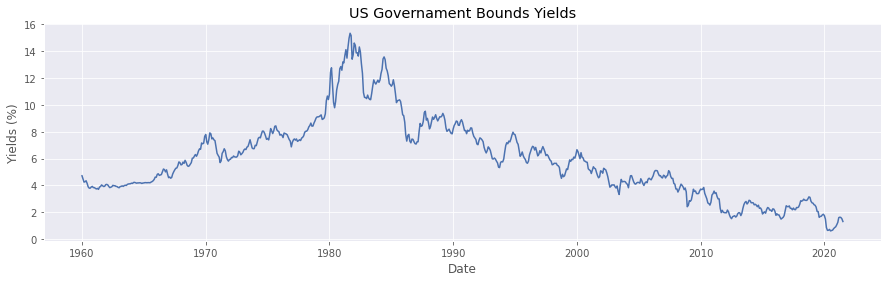

In [6]:
# Loads data and makes small modifications on the df
df_us = pd.read_csv("datasets/US_govbonds_yields.csv", na_values='.')
df_us['DATE'] = pd.to_datetime(df_us['DATE'], format='%Y-%m-%d')
df_us.rename(columns={'DATE': 'date', 'IRLTLT01USM156N': 'value'}, inplace=True)
df_us.dropna(inplace=True)

# Plots the time series
plt.plot(df_us['date'], df_us['value'])
plt.title("US Governament Bounds Yields")
plt.xlabel("Date")
plt.ylabel("Yields (%)")
plt.show()

## Apply Log-Transform

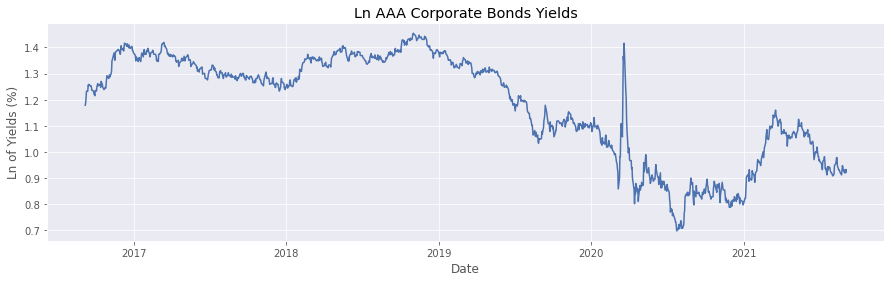

In [7]:
df_aaa['value'] = np.log(df_aaa['value'])

# Plots the time series
plt.plot(df_aaa['date'], df_aaa['value'])
plt.title("Ln AAA Corporate Bonds Yields")
plt.xlabel("Date")
plt.ylabel("Ln of Yields (%)")
plt.show()

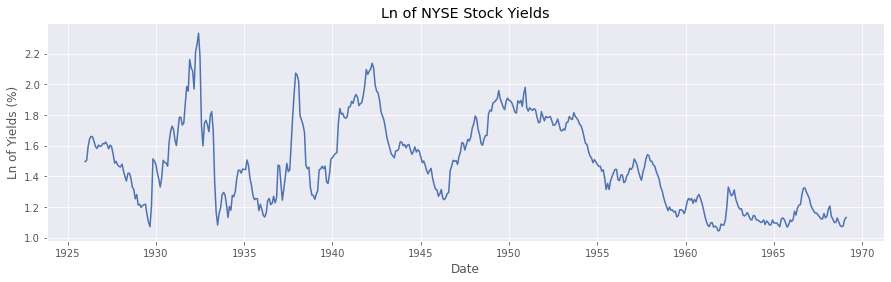

In [8]:
df_nyse['value'] = np.log(df_nyse['value'])

# Plots the time series
plt.plot(df_nyse['date'], df_nyse['value'])
plt.title("Ln of NYSE Stock Yields")
plt.xlabel("Date")
plt.ylabel("Ln of Yields (%)")
plt.show()

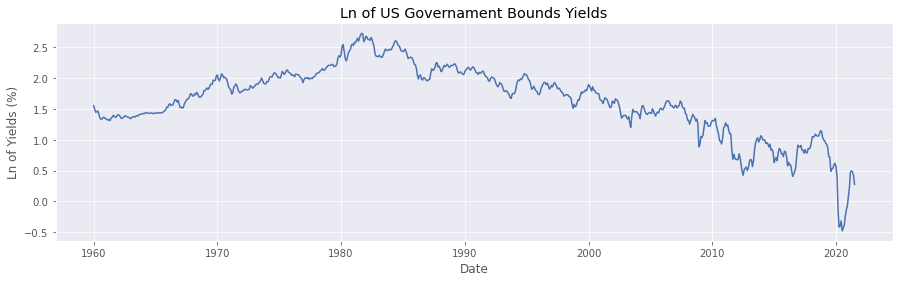

In [9]:
df_us['value'] = np.log(df_us['value'])

# Plots the time series
plt.plot(df_us['date'], df_us['value'])
plt.title("Ln of US Governament Bounds Yields")
plt.xlabel("Date")
plt.ylabel("Ln of Yields (%)")
plt.show()

## Deterministic Trend Analysis

Firstly we shall do the Augmented Dickey-Fuller test to . The test has the following as hypotesis:

<br>

$$
    H_0: \text{there is a unit root.} \\
    H_1: \text{there is no unit root (the time series is stationary).}
$$

<br>

If the pvalue is above a critical size, then we cannot reject that there is a unit root. We start by running a general regression (includes constant and trend).

In [65]:
adf_res = sm.adfuller(df_aaa['value'], regression='ct', maxlag=12, autolag='AIC', regresults=True)
print('ADF Results (Constant + Trend):')
print('t-value:', adf_res[0])
print('p-value:', adf_res[1])
print('used lags:', adf_res[3].usedlag)
print(adf_res[3].resols.summary())

ADF Results (Constant + Trend):
t-value: -2.6364122978936644
p-value: 0.263419911735774
used lags: 9
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     4.897
Date:                Fri, 10 Sep 2021   Prob (F-statistic):           1.86e-07
Time:                        15:15:06   Log-Likelihood:                 3346.4
No. Observations:                1241   AIC:                            -6669.
Df Residuals:                    1229   BIC:                            -6607.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

1. Check if x1's t-stat is below critical value -> t-stat for x1 = -2.64 -> we do not reject $H_0: \rho = 0$.

2. Check if coefficient of the trend is statistically significant -> t-stat for x11 = -2.467 -> the coef. of the trend is not significant.

3. Run test again without trend.

In [66]:
adf_res = sm.adfuller(df_aaa['value'], regression='c', maxlag=12, autolag='AIC', regresults=True)
print('ADF Results (Constant):') 
print('t-value:', adf_res[0])
print('p-value:', adf_res[1])
print('used lags:', adf_res[3].usedlag)
print(adf_res[3].resols.summary())

ADF Results (Constant):
t-value: -1.1042386242367888
p-value: 0.7133786340850403
used lags: 9
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     4.758
Date:                Fri, 10 Sep 2021   Prob (F-statistic):           1.01e-06
Time:                        15:18:05   Log-Likelihood:                 3343.3
No. Observations:                1241   AIC:                            -6665.
Df Residuals:                    1230   BIC:                            -6608.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

- We do not reject the non-stationarity hypothesis, because the p-value is 0.713.
- Check if const is stat. significant -> it is not, the t-value is not high enough.
- Run restricted regression (no const, no trend.)

In [67]:
adf_res = sm.adfuller(df_aaa['value'], regression='nc', maxlag=12, autolag='AIC', regresults=True)
print('ADF Results:') 
print('t-value:', adf_res[0])
print('p-value:', adf_res[1])
print('used lags:', adf_res[3].usedlag)
print(adf_res[3].resols.summary())

ADF Results:
t-value: -0.746606084332919
p-value: 0.39297351895967925
used lags: 9
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.037
Model:                            OLS   Adj. R-squared (uncentered):              0.029
Method:                 Least Squares   F-statistic:                              4.690
Date:                Fri, 10 Sep 2021   Prob (F-statistic):                    1.33e-06
Time:                        15:20:52   Log-Likelihood:                          3342.8
No. Observations:                1241   AIC:                                     -6666.
Df Residuals:                    1231   BIC:                                     -6614.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err     

Since we cannot reject the non-stationarity hypothesis, the ADF test suggests that the series is non-stationary without constant. This means that the series has a unit root (stochastic trend), but no drift. We can check this result by running the ADF test on the first difference of the series.

In [68]:
df_aaa['diff'] = df_aaa['value'].diff()
adf_res = sm.adfuller(df_aaa['diff'].dropna(), regression='ct', maxlag=12, autolag='AIC', regresults=True)
print('ADF Results:') 
print('t-value:', adf_res[0])
print('p-value:', adf_res[1])
print('used lags:', adf_res[3].usedlag)
print(adf_res[3].resols.summary())

ADF Results:
t-value: -13.457236346658627
p-value: 3.861339064837686e-21
used lags: 8
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     132.5
Date:                Fri, 10 Sep 2021   Prob (F-statistic):          2.28e-187
Time:                        15:21:25   Log-Likelihood:                 3342.9
No. Observations:                1241   AIC:                            -6664.
Df Residuals:                    1230   BIC:                            -6607.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

Here, we can see that the non-stationarity hypothesis is rejected, which means that AAA Corporate Bond Yields are I(1).

## Seasonal Variations Analysis

## Stochastic Trend Analysis

## Stationary ARMA Model